<a href="https://colab.research.google.com/github/meng19951027/machine-learing/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

张量表示

In [ ]:
import tensorflow as tf
a=tf.constant([[1,5]],dtype=tf.int64)
print(a)
print(a.dtype)
print(a.shape)

tf.Tensor([[1 5]], shape=(1, 2), dtype=int64)
<dtype: 'int64'>
(1, 2)


将numpy数据转化为tesnor数据类型

In [ ]:
import numpy as np
import tensorflow as tf
a=np.arange(5)
b=tf.convert_to_tensor(a,dtype=tf.float32)
print(a)
print(b)

[0 1 2 3 4]
tf.Tensor([0. 1. 2. 3. 4.], shape=(5,), dtype=float32)


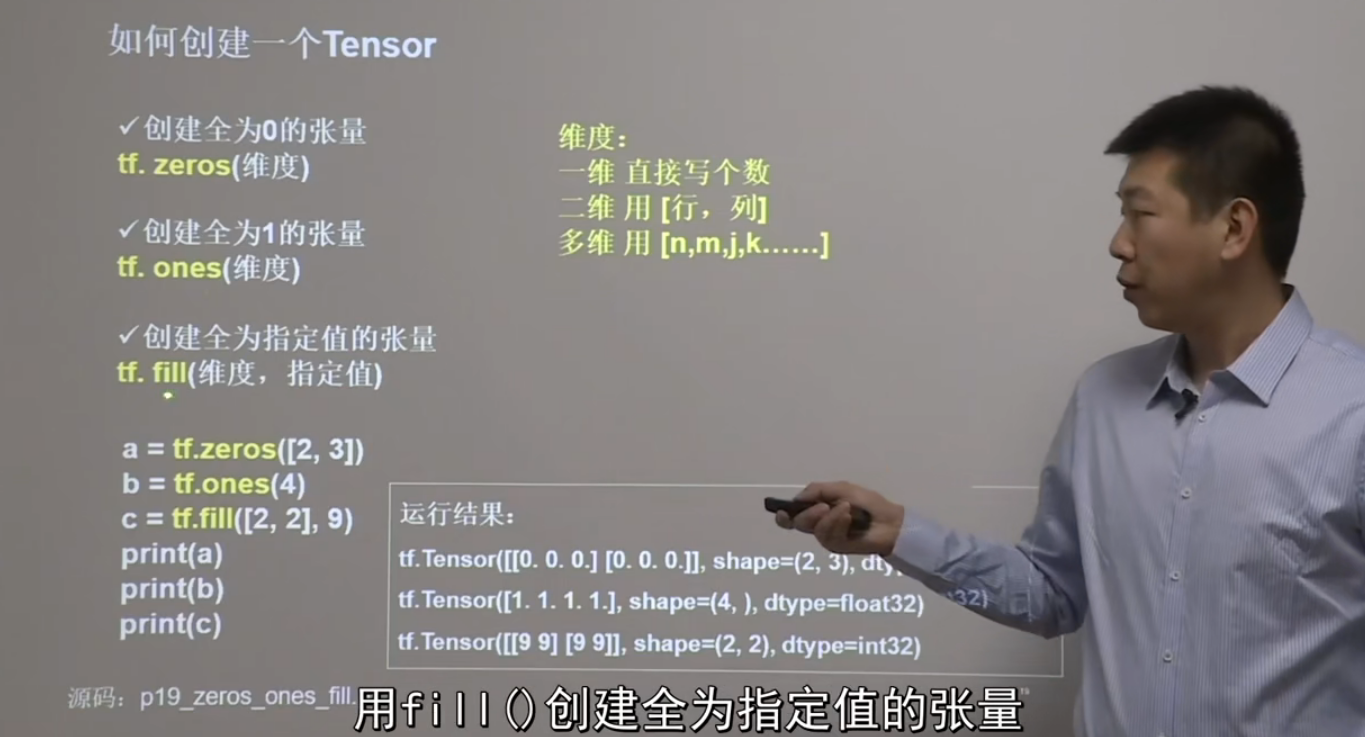

In [ ]:
tf.zeros([2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.fill([2,2],9)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9, 9],
       [9, 9]], dtype=int32)>

In [ ]:
tf.ones(4)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

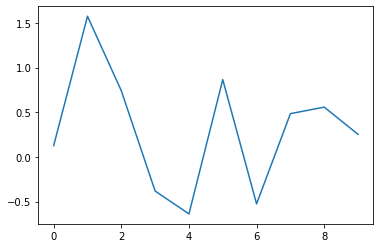

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(10))
plt.show()

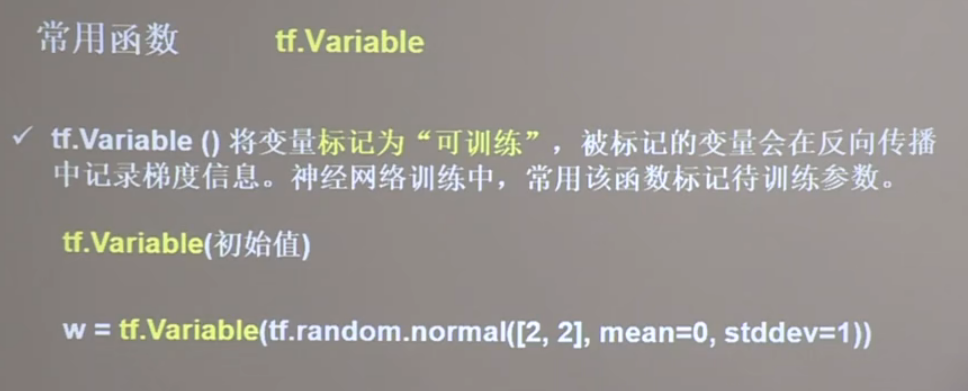

In [ ]:
w=tf.Variable(tf.random.normal([2,2],mean=0,stddev=1))
w

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.9387331 ,  0.78094983],
       [ 0.17505427, -3.1743014 ]], dtype=float32)>

# 常用函数

tf.cast()  #强制tensor转化为数据类型
axis=0表示纵向操作
axis=1表示横向操作
不指定axis则对所有元素操作


In [ ]:
#两个矩阵相乘
a=tf.fill([2,2],3)
b=tf.fill([2,2],4)
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[24, 24],
       [24, 24]], dtype=int32)>

输入特征与标签的配对  
tf.data.Dataset.from_tensor_slices(输入特征,标签)  
numpy和tensor格式都可以用该语句读入数据

In [ ]:
features = tf.constant([12,23,10,17])
labels = tf.constant([0,1,1,0])
dataset = tf.data.Dataset.from_tensor_slices((features,labels))
print(dataset)
for element in dataset:
  print(element)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


with函数  
```
with tf.GradientTape() as tape:
#若干个计算过程
grad=tape.gradient(函数、对谁求导)
```

In [ ]:
with tf.GradientTape() as tape:
  w=tf.Variable(tf.constant(3.0))
  loss= tf.pow(w,2)
  grad = tape.gradient(loss,w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
tf.one_hot(待转换的数据，depth=几个分类)

In [ ]:
from tensorflow.python.framework.constant_op import constant
labels=tf.constant([0,1,2])
output=tf.one_hot(labels,depth=3)
print(output)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [ ]:
tf的常用函数——tf.nn.softmax(y)  #使输出符合概率分布

参数的自更新assign_sub

In [ ]:
from tensorflow.python.framework.constant_op import constant
# 

w=tf.Variable(4)
w.assign_sub(1)
w


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

返回指定操作轴方向的最大值的索引 tf.argmax(张量名,axis=操作轴)

In [ ]:
import numpy as np
test = np.array([[1,2,3],[2,3,4],[5,4,3],[8,7,2]])
print(test)
print(tf.argmax (test,axis=0))#返回每一列（经度）最大值的索引
print(tf.argmax(test,axis=1))#返回每一行（纬度）最大值的索引

[[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


# 用神经网络实现鸢尾花分类

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_iris
x_data =load_iris().data#返回iris数据集所有输入特征
y_data =load_iris().target#返回iris数据集所有标签√数据集乱序
np.random.seed(116)#使用相同的seed，使输入特征/标签一一对应np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
#数据集分出永不相见的训练集和测试集
x_train = x_data[:-30]
y_train =y_data[:-30]
x_test =x_data[-30:]
y_test = y_data[-30:]
#配成[输入特征，标翎]对，每次喂入一小撮（batch)
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

# RNN模型的乘客量预测

In [ ]:
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线
 
# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
 
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
 
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
 
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
 
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
 
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
 
# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))
 
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和
 
# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])
 
        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新
 
    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备
 
    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
 
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像
 
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

tensorflow的运行，建立图结构，然后定义任务，然后执行

In [ ]:
import tensorflow as tf
a=tf.constant([1,2])
b=tf.constant([2,3])
result=tf.add(a,b)
sess=tf.Session()
print(sess.run(result))
sess.close()

AttributeError: ignored

In [2]:
# 上述报错是版本问题

# 深度学习网络

In [ ]:
tf.keras
# 单输入与单输出的序列模式
tf.data
tf.GradientrTape


In [3]:
import tensorflow as tf